In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import time

In [5]:
df1=pd.read_csv("motor_vehicle_sale.csv")
df2=pd.read_csv("gas_price.csv")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Check the first 5 records
df1.head(5)

,Year,Month,GEO,Vehicle type,Number Of Sales
0,2001,January,Alberta,Passenger cars,4263
1,2001,January,Alberta,Trucks,8102
2,2001,January,British Columbia,Passenger cars,5005
3,2001,January,British Columbia,Trucks,5595
4,2001,January,Manitoba,Passenger cars,1106


In [7]:
df2.head(5)

,Year,Month,GEO,Type of fuel,Price
0,2001,December,Alberta,Regular unleaded gasoline at full service fill...,48.7
1,2001,November,Alberta,Regular unleaded gasoline at full service fill...,52.3
2,2001,October,Alberta,Regular unleaded gasoline at full service fill...,58.8
3,2001,August,Alberta,Regular unleaded gasoline at full service fill...,61.1
4,2001,July,Alberta,Regular unleaded gasoline at full service fill...,62.0


In [8]:
df2= pd.concat([df2] * 2, ignore_index=True)

In [9]:
df1.sort_values(by=['Year', 'Month', 'GEO'], inplace=True)
df1.reset_index(drop=True, inplace=True)
df1

,Year,Month,GEO,Vehicle type,Number Of Sales
0,2001,April,Alberta,Passenger cars,6712
1,2001,April,Alberta,Trucks,10425
2,2001,April,British Columbia,Passenger cars,7269
3,2001,April,British Columbia,Trucks,8299
4,2001,April,Manitoba,Passenger cars,1598
...,...,...,...,...,...
5295,2023,January,Prince Edward Island,Trucks,341
5296,2023,January,Quebec,Passenger cars,3997
5297,2023,January,Quebec,Trucks,18937
5298,2023,January,Saskatchewan,Passenger cars,178


In [10]:
df2.sort_values(by=['Year', 'Month', 'GEO'], inplace=True)
df2.reset_index(drop=True, inplace=True)
df2

,Year,Month,GEO,Type of fuel,Price
0,2001,April,Alberta,Regular unleaded gasoline at full service fill...,62.6
1,2001,April,Alberta,Regular unleaded gasoline at full service fill...,62.6
2,2001,April,British Columbia,Regular unleaded gasoline at full service fill...,73.7
3,2001,April,British Columbia,Regular unleaded gasoline at full service fill...,73.7
4,2001,April,Manitoba,Regular unleaded gasoline at full service fill...,65.4
...,...,...,...,...,...
5705,2023,January,Quebec,Regular unleaded gasoline at self service fill...,165.1
5706,2023,January,Saskatchewan,Regular unleaded gasoline at self service fill...,147.9
5707,2023,January,Saskatchewan,Regular unleaded gasoline at self service fill...,147.9
5708,2023,January,NaN,Regular unleaded gasoline at self service fill...,150.3


In [18]:
df1.loc[:, 'Fuel Price(In Cents)'] = df2['Price'].copy()
df1

/tmp/ipython-input-951160209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Fuel Price(In Cents)'] = df2['Price'].copy()


,Year,Month,GEO,Vehicle type,Number Of Sales,Date,Fuel Price(In Cents)
0,2001,January,Alberta,Passenger cars,4263,2001-01-01,62.6
1,2001,January,Alberta,Trucks,8102,2001-01-01,62.6
2,2001,January,British Columbia,Passenger cars,5005,2001-01-01,73.7
3,2001,January,British Columbia,Trucks,5595,2001-01-01,73.7
4,2001,January,Manitoba,Passenger cars,1106,2001-01-01,65.4
...,...,...,...,...,...,...,...
5275,2022,December,Prince Edward Island,Trucks,383,2022-12-01,131.5
5276,2022,December,Quebec,Passenger cars,4553,2022-12-01,135.8
5277,2022,December,Quebec,Trucks,20745,2022-12-01,135.8
5278,2022,December,Saskatchewan,Passenger cars,209,2022-12-01,153.4


In [19]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df1['Month'] = pd.Categorical(df1['Month'], categories=months_order, ordered=True)
df1.sort_values(by=['Year', 'Month'], inplace=True)
df1.reset_index(drop=True, inplace=True)
print(df1.head())
df1

   Year    Month               GEO    Vehicle type  Number Of Sales  \
0  2001  January           Alberta  Passenger cars             4263   
1  2001  January           Alberta          Trucks             8102   
2  2001  January  British Columbia  Passenger cars             5005   
3  2001  January  British Columbia          Trucks             5595   
4  2001  January          Manitoba  Passenger cars             1106   

        Date  Fuel Price(In Cents)  
0 2001-01-01                  62.6  
1 2001-01-01                  62.6  
2 2001-01-01                  73.7  
3 2001-01-01                  73.7  
4 2001-01-01                  65.4  


/tmp/ipython-input-990660692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Month'] = pd.Categorical(df1['Month'], categories=months_order, ordered=True)
/tmp/ipython-input-990660692.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.sort_values(by=['Year', 'Month'], inplace=True)


,Year,Month,GEO,Vehicle type,Number Of Sales,Date,Fuel Price(In Cents)
0,2001,January,Alberta,Passenger cars,4263,2001-01-01,62.6
1,2001,January,Alberta,Trucks,8102,2001-01-01,62.6
2,2001,January,British Columbia,Passenger cars,5005,2001-01-01,73.7
3,2001,January,British Columbia,Trucks,5595,2001-01-01,73.7
4,2001,January,Manitoba,Passenger cars,1106,2001-01-01,65.4
...,...,...,...,...,...,...,...
5275,2022,December,Prince Edward Island,Trucks,383,2022-12-01,131.5
5276,2022,December,Quebec,Passenger cars,4553,2022-12-01,135.8
5277,2022,December,Quebec,Trucks,20745,2022-12-01,135.8
5278,2022,December,Saskatchewan,Passenger cars,209,2022-12-01,153.4


In [20]:
df1 = df1[df1['Year'] != 2023]

In [21]:
final_df=df1
final_df.head(5)

,Year,Month,GEO,Vehicle type,Number Of Sales,Date,Fuel Price(In Cents)
0,2001,January,Alberta,Passenger cars,4263,2001-01-01,62.6
1,2001,January,Alberta,Trucks,8102,2001-01-01,62.6
2,2001,January,British Columbia,Passenger cars,5005,2001-01-01,73.7
3,2001,January,British Columbia,Trucks,5595,2001-01-01,73.7
4,2001,January,Manitoba,Passenger cars,1106,2001-01-01,65.4


In [22]:
final_df.columns

Index(['Year', 'Month', 'GEO', 'Vehicle type', 'Number Of Sales', 'Date',
       'Fuel Price(In Cents)'],
      dtype='object')

In [23]:
file_path = '/content/drive/MyDrive/Colab Notebooks/final_df.csv'
final_df.to_csv(file_path, index=False)


/tmp/ipython-input-3695035293.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final_df['Date'] = pd.to_datetime(final_df['Year'].astype(str) + '-' + final_df['Month'].astype(str))


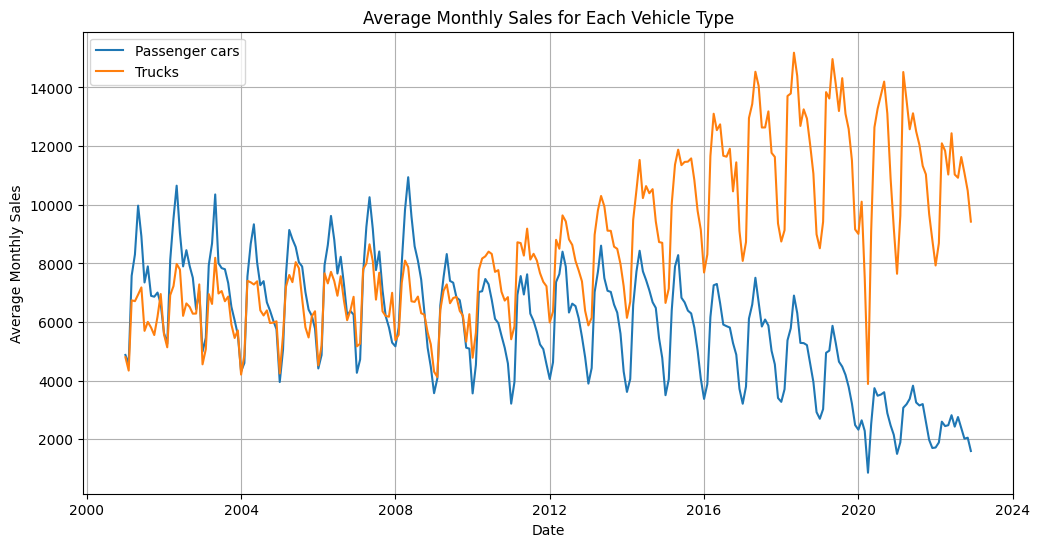

In [24]:

final_df['Date'] = pd.to_datetime(final_df['Year'].astype(str) + '-' + final_df['Month'].astype(str))

avg_sales = final_df.groupby(['Date', 'Vehicle type'])['Number Of Sales'].mean().unstack()

plt.figure(figsize=(12, 6))
for column in avg_sales.columns:
    plt.plot(avg_sales.index, avg_sales[column], label=column)

plt.title('Average Monthly Sales for Each Vehicle Type')
plt.xlabel('Date')
plt.ylabel('Average Monthly Sales')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


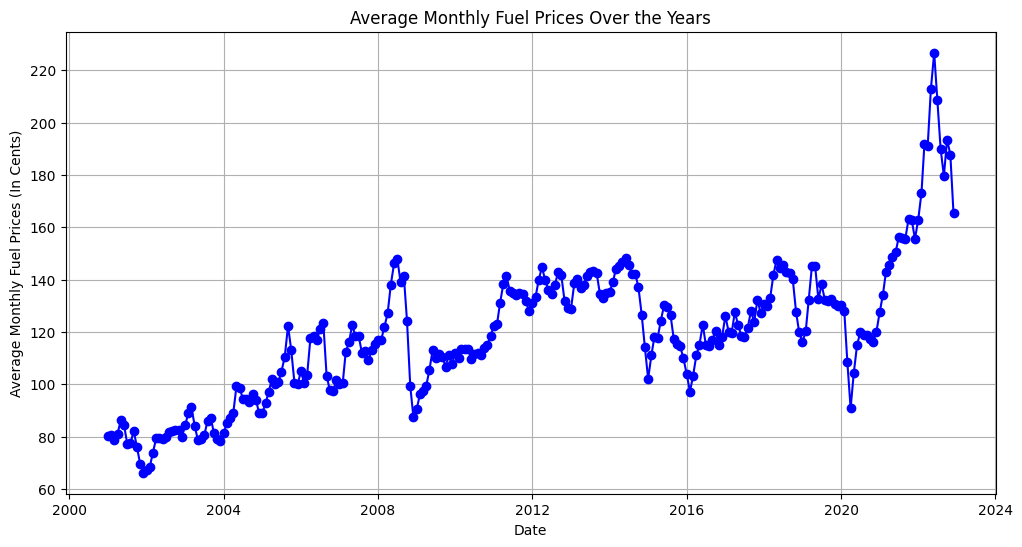

In [ ]:
avg_fuel_prices = final_df.groupby('Date')['Fuel Price(In Cents)'].mean()

# Plot the time series of average monthly fuel prices
plt.figure(figsize=(12, 6))
plt.plot(avg_fuel_prices.index, avg_fuel_prices, color='blue', marker='o', linestyle='-')
plt.title('Average Monthly Fuel Prices Over the Years')
plt.xlabel('Date')
plt.ylabel('Average Monthly Fuel Prices (In Cents)')
plt.grid(True)
plt.show()

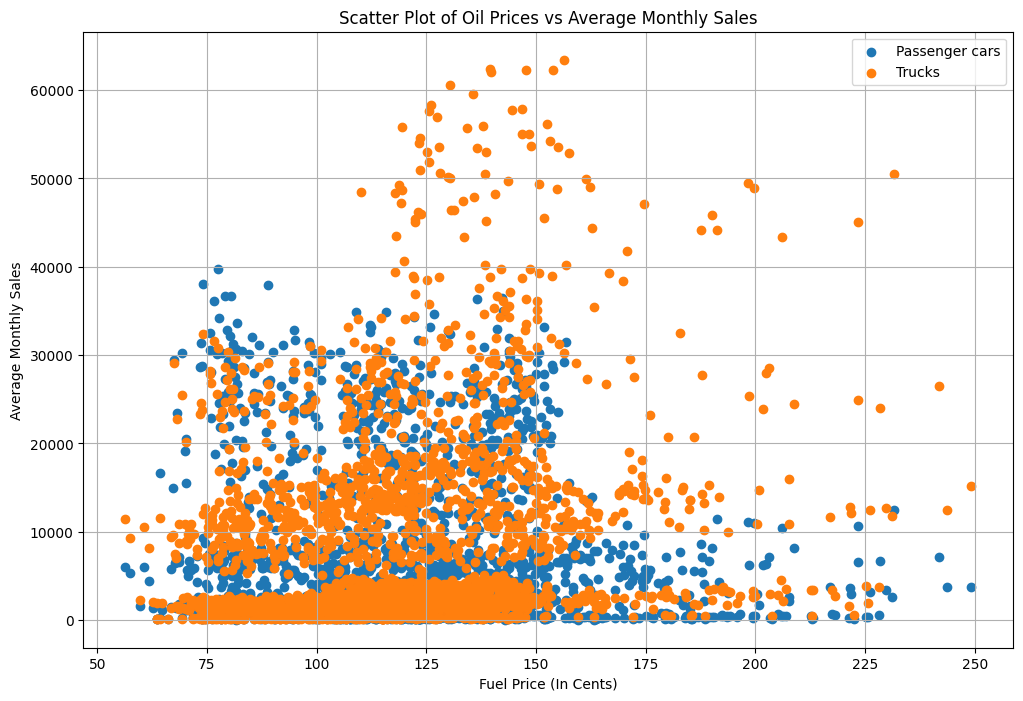

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming final_df contains the data

# Calculate correlation between oil prices and average monthly sales for each vehicle type
correlation_matrix = final_df.groupby('Vehicle type').apply(lambda x: x['Fuel Price(In Cents)'].corr(x['Number Of Sales']))


# Plot scatter plots
plt.figure(figsize=(12, 8))
for vehicle_type, data in final_df.groupby('Vehicle type'):
    plt.scatter(data['Fuel Price(In Cents)'], data['Number Of Sales'], label=vehicle_type)
plt.title('Scatter Plot of Oil Prices vs Average Monthly Sales')
plt.xlabel('Fuel Price (In Cents)')
plt.ylabel('Average Monthly Sales')
plt.legend()
plt.grid(True)
plt.show()


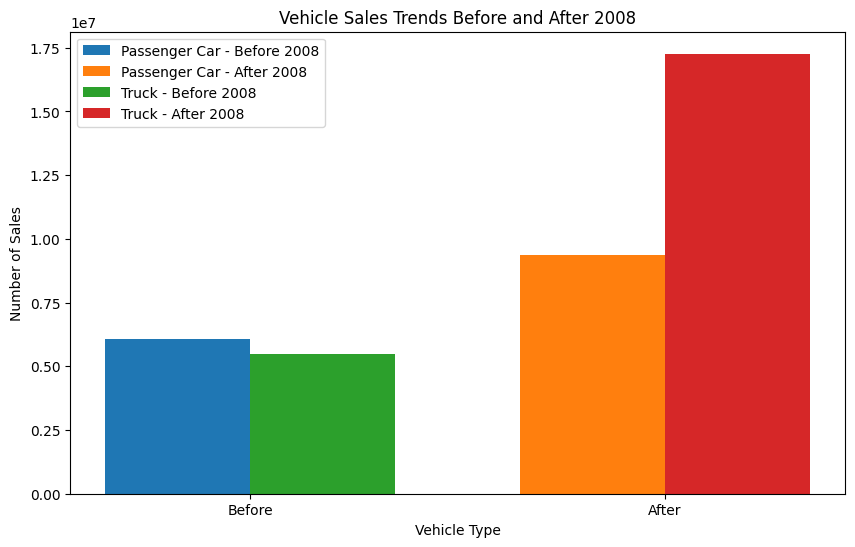

In [ ]:
significant_change_date = pd.to_datetime('2008-01-01')
before_change = final_df[final_df['Date'] < significant_change_date]
after_change = final_df[final_df['Date'] >= significant_change_date]

# Aggregate the number of sales for each period and each vehicle type
sales_before_passenger = before_change[before_change['Vehicle type'] == 'Passenger cars']['Number Of Sales'].sum()
sales_before_truck = before_change[before_change['Vehicle type'] == 'Trucks']['Number Of Sales'].sum()
sales_after_passenger = after_change[after_change['Vehicle type'] == 'Passenger cars']['Number Of Sales'].sum()
sales_after_truck = after_change[after_change['Vehicle type'] == 'Trucks']['Number Of Sales'].sum()

# Plotting the sales trends for passenger cars and trucks
plt.figure(figsize=(10, 6))

# Bar width
bar_width = 0.35

# X positions for bars
x_before = 1
x_after = 2

# Plot bars
plt.bar(x_before - bar_width/2, sales_before_passenger, bar_width, label='Passenger Car - Before 2008')
plt.bar(x_after - bar_width/2, sales_after_passenger, bar_width, label='Passenger Car - After 2008')
plt.bar(x_before + bar_width/2, sales_before_truck, bar_width, label='Truck - Before 2008')
plt.bar(x_after + bar_width/2, sales_after_truck, bar_width, label='Truck - After 2008')

# Add labels and legend
plt.title('Vehicle Sales Trends Before and After 2008')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Sales')
plt.xticks([x_before, x_after], ['Before', 'After'])
plt.legend()

plt.show()

In [ ]:
oil_prices_column = 'Fuel Price(In Cents)'
car_sales_column = 'Number Of Sales'

# Calculate correlation coefficients for each vehicle type
correlation_passenger = final_df[final_df['Vehicle type'] == 'Passenger cars'][[oil_prices_column, car_sales_column]].corr().iloc[0, 1]
correlation_truck = final_df[final_df['Vehicle type'] == 'Trucks'][[oil_prices_column, car_sales_column]].corr().iloc[0, 1]

print("Correlation coefficient between oil prices and car sales for Passenger cars:", correlation_passenger)
print("Correlation coefficient between oil prices and car sales for Trucks:", correlation_truck)


Correlation coefficient between oil prices and car sales for Passenger cars: -0.03730668067194005
Correlation coefficient between oil prices and car sales for Trucks: 0.20233915064055824


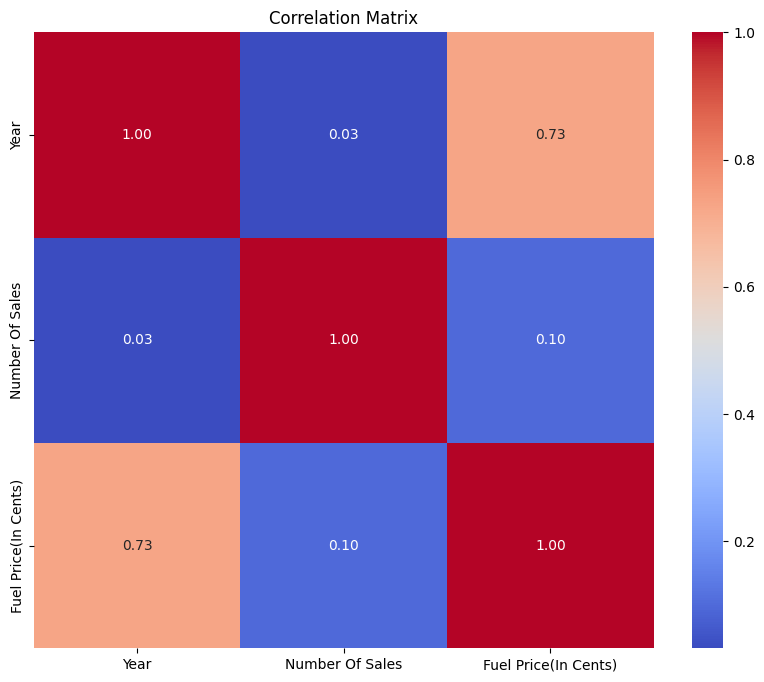

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have final_df containing your dataset

# Filter columns with numerical data
numeric_columns = final_df.select_dtypes(include='number')

# Calculate correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


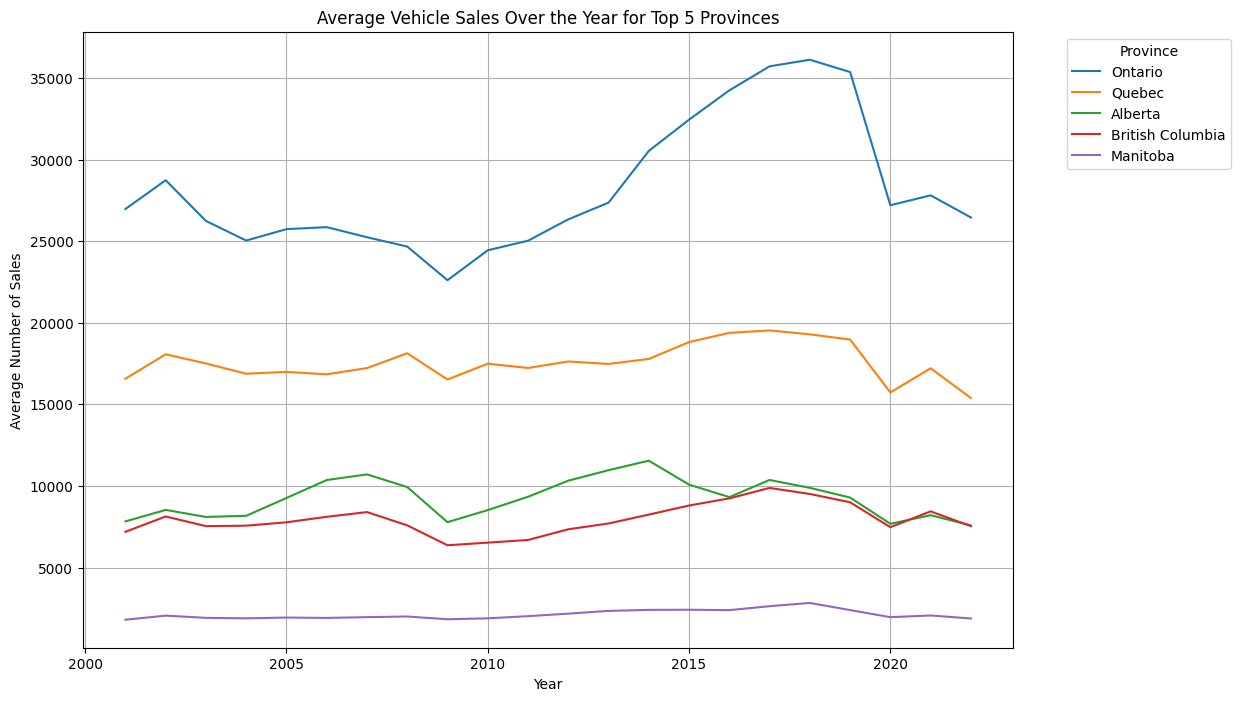

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have final_df containing your dataset

# Calculate total sales for each province
province_total_sales = final_df.groupby('GEO')['Number Of Sales'].sum()

# Select the top 5 provinces with the highest total sales
top_5_provinces = province_total_sales.nlargest(5).index

# Filter the data for the top 5 provinces
top_5_province_data = final_df[final_df['GEO'].isin(top_5_provinces)]

# Group the filtered data by 'GEO' and 'Year', and calculate the average sales
average_sales_by_geo_year = top_5_province_data.groupby(['GEO', 'Year'])['Number Of Sales'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))

# Iterate over top 5 provinces and plot average sales for each
for province in top_5_provinces:
    data = average_sales_by_geo_year[average_sales_by_geo_year['GEO'] == province]
    plt.plot(data['Year'], data['Number Of Sales'], label=province)

plt.title('Average Vehicle Sales Over the Year for Top 5 Provinces')
plt.xlabel('Year')
plt.ylabel('Average Number of Sales')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [ ]:
sample_df = final_df.sample(n=10)
sample_df

,Year,Month,GEO,Vehicle type,Number Of Sales,Fuel Price(In Cents),Date
4103,2018,February,British Columbia,Trucks,10219,164.1,2018-02-01
1113,2005,August,Ontario,Trucks,26208,108.9,2005-08-01
3111,2013,December,Nova Scotia,Trucks,1532,139.4,2013-12-01
3121,2014,January,Alberta,Trucks,13293,118.7,2014-01-01
593,2003,June,Ontario,Trucks,28154,75.6,2003-06-01
1928,2009,January,Newfoundland and Labrador,Passenger cars,504,92.0,2009-01-01
2383,2010,December,British Columbia,Trucks,7392,132.0,2010-12-01
2451,2011,March,Nova Scotia,Trucks,2153,133.5,2011-03-01
3835,2016,December,Prince Edward Island,Trucks,394,113.2,2016-12-01
2947,2013,April,New Brunswick,Trucks,2315,134.0,2013-04-01


In [ ]:
X

,Year,Fuel Price(In Cents),GEO_Alberta,GEO_British Columbia,GEO_Manitoba,GEO_New Brunswick,GEO_Newfoundland and Labrador,GEO_Nova Scotia,GEO_Ontario,GEO_Prince Edward Island,...,Month_March,Month_April,Month_May,Month_June,Month_July,Month_August,Month_September,Month_October,Month_November,Month_December
0,2001,72.6,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2001,72.6,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2001,78.9,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2001,78.9,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2001,72.8,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5275,2022,159.5,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
5276,2022,180.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5277,2022,180.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5278,2022,164.1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
X = final_df[['Year', 'GEO', 'Vehicle type', 'Fuel Price(In Cents)', 'Month']]
y = final_df['Number Of Sales']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Function to evaluate RMSE
def evaluate_rmse(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return rmse

# Function to evaluate MAPE
def evaluate_mape(y_true, y_pred):
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return mape


future_data =  [[2025,172.6,1, 0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	1,	0,	0,	0,	0,	0,0,0,0,0,0,1]]



In [ ]:
# Linear Regression
start_time = time.time()
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_train_time = time.time() - start_time

# Evaluate models
lr_predictions = lr_model.predict(X_test)
lr_rmse = evaluate_rmse(y_test, lr_predictions)
lr_mape = evaluate_mape(y_test, lr_predictions)

print("Linear Regression RMSE:", lr_rmse)
print("Linear Regression MAPE:", lr_mape)
print("Linear Regression Training Time:", lr_train_time)

start_time = time.time()
future_predictions_lr = lr_model.predict(future_data)
lr_prediction_time = time.time() - start_time

print("Linear Regression Prediction Time:", lr_prediction_time)
print("Future Linear Regression Prediction:", future_predictions_lr)

Linear Regression RMSE: 4210.590662507497
Linear Regression MAPE: 1.5107060332491677
Linear Regression Training Time: 0.01924610137939453
Linear Regression Prediction Time: 0.002560853958129883
Future Linear Regression Prediction: [4959.81363424]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Gradient Boosting
start_time = time.time()
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_train_time = time.time() - start_time

gb_predictions = gb_model.predict(X_test)
gb_rmse = evaluate_rmse(y_test, gb_predictions)
gb_mape = evaluate_mape(y_test, gb_predictions)

print("Gradient Boosting RMSE:", gb_rmse)
print("Gradient Boosting MAPE:", gb_mape)
print("Gradient Boosting Training Time:", gb_train_time)

start_time = time.time()
future_predictions_gb = gb_model.predict(future_data)
gb_prediction_time = time.time() - start_time

print("Gradient Boosting Prediction Time:", gb_prediction_time)
print("Future Gradient Boosting Prediction:", future_predictions_gb)

Gradient Boosting RMSE: 2022.519205288318
Gradient Boosting MAPE: 0.5132015692707662
Gradient Boosting Training Time: 0.38396549224853516
Gradient Boosting Prediction Time: 0.0006480216979980469
Future Gradient Boosting Prediction: [2396.47108651]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# Random Forest
start_time = time.time()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_train_time = time.time() - start_time

rf_predictions = rf_model.predict(X_test)
rf_rmse = evaluate_rmse(y_test, rf_predictions)
rf_mape = evaluate_mape(y_test, rf_predictions)

print("Random Forest RMSE:", rf_rmse)
print("Random Forest MAPE:", rf_mape)
print("Random Forest Training Time:", rf_train_time)

start_time = time.time()
future_predictions_rf = rf_model.predict(future_data)
rf_prediction_time = time.time() - start_time

print("Random Forest Prediction Time:", rf_prediction_time)
print("Future Random Forest Prediction:", future_predictions_rf)

Random Forest RMSE: 1298.602442110225
Random Forest MAPE: 0.11149943440215529
Random Forest Training Time: 3.59944748878479
Random Forest Prediction Time: 0.007151365280151367
Future Random Forest Prediction: [1415.92]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
X.columns

Index(['Year', 'Fuel Price(In Cents)', 'GEO_Alberta', 'GEO_British Columbia',
       'GEO_Manitoba', 'GEO_New Brunswick', 'GEO_Newfoundland and Labrador',
       'GEO_Nova Scotia', 'GEO_Ontario', 'GEO_Prince Edward Island',
       'GEO_Quebec', 'GEO_Saskatchewan', 'Vehicle type_Passenger cars',
       'Vehicle type_Trucks', 'Month_January', 'Month_February', 'Month_March',
       'Month_April', 'Month_May', 'Month_June', 'Month_July', 'Month_August',
       'Month_September', 'Month_October', 'Month_November', 'Month_December'],
      dtype='object')